23rd d 

Adam Rmsprop Sgd

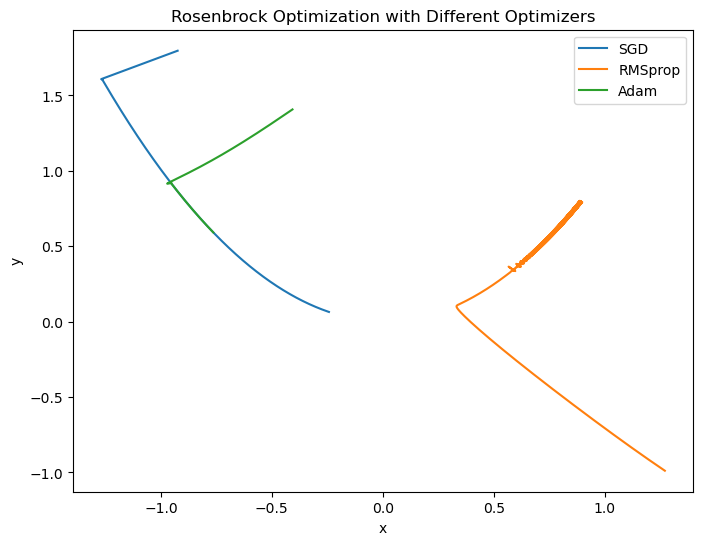

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def gradient(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    df_dy = 200 * (y - x ** 2)
    return np.array([df_dx, df_dy])

# Optimization methods
class Optimizer:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, x, y, grad):
        raise NotImplementedError

class SGD(Optimizer):
    def update(self, x, y, grad):
        x -= self.lr * grad[0]
        y -= self.lr * grad[1]
        return x, y

class RMSprop(Optimizer):
    def __init__(self, lr=0.01, beta=0.9, eps=1e-8):
        super().__init__(lr)
        self.beta = beta
        self.eps = eps
        self.v = np.array([0.0, 0.0])
    
    def update(self, x, y, grad):
        self.v = self.beta * self.v + (1 - self.beta) * (grad ** 2)
        x -= (self.lr / (np.sqrt(self.v[0]) + self.eps)) * grad[0]
        y -= (self.lr / (np.sqrt(self.v[1]) + self.eps)) * grad[1]
        return x, y

class Adam(Optimizer):
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        super().__init__(lr)
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = np.array([0.0, 0.0])
        self.v = np.array([0.0, 0.0])
        self.t = 0

    def update(self, x, y, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        x -= (self.lr / (np.sqrt(v_hat[0]) + self.eps)) * m_hat[0]
        y -= (self.lr / (np.sqrt(v_hat[1]) + self.eps)) * m_hat[1]
        return x, y

# Run optimization
def optimize(optimizer, epochs=1000):
    x, y = np.random.uniform(-2, 2), np.random.uniform(-2, 2)
    history = [(x, y)]
    for _ in range(epochs):
        grad = gradient(x, y)
        x, y = optimizer.update(x, y, grad)
        history.append((x, y))
    return np.array(history)

optimizers = {"SGD": SGD(0.001), "RMSprop": RMSprop(0.01), "Adam": Adam(0.01)}

# Run optimizers
histories = {name: optimize(opt) for name, opt in optimizers.items()}

# Plot results
plt.figure(figsize=(8, 6))
for name, history in histories.items():
    plt.plot(history[:, 0], history[:, 1], label=name)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Optimization with Different Optimizers")
plt.show()
